> Trabajo del grupo 1 de Introducción al Aprendizaje Automático
>
> Miembros: Damián Campana, Daniel Peralta, Fernando Fontana, Gaspar García Bazán, Javier Gallo, Mauro Paris.

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [3]:
from sklearn.model_selection import train_test_split

X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

<hr>

1- Es un conjunto de datos de inmuebles en suburbios de Boston, con precios de los inmuebles y otras características.
13 Atributos y 506 instancias, es decir, 506 suburbios.

2- Según la información que encontramos en internet, este conjunto de datos tiene principalmente dos objetivos de predicción: los niveles de óxido nitroso y el valor medio de vivienda.

3- Hay 14 atributos disponibles:
- **CRIM**:     per capita crime rate by town
- **ZN**:       proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**:    proportion of non-retail business acres per town
- **CHAS**:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**:      nitric oxides concentration (parts per 10 million)
- **RM**:       average number of rooms per dwelling
- **AGE**:      proportion of owner-occupied units built prior to 1940
- **DIS**:      weighted distances to five Boston employment centres
- **RAD**:      index of accessibility to radial highways
- **TAX**:      full-value property-tax rate per USS10.000
- **PTRATIO**:  pupil-teacher ratio by town
- **B**:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**:    % lower status of the population
- **MEDV**     Median value of owner-occupied homes in $1000

4- Suponemos que los atributos determinantes pueden ser:
- La tasa de criminalidad per capita por ciudad (CRIM)
- Proporción de areas residenciales (ZN)
- Distancias ponderadas a los centros de Boston (DIS)
- Índice de acceso a rutas (RAD)
- Tasa de impuesto a la propiedad (TAX)
- Valor medio de viviendas ocupadas por sus dueños (MEDV)
- Niveles de óxido nítrico (NOX)

5- En principio encontramos que carece de varios datos relevantes para predecir el precio de una propiedad, tales como:
- m2 techados de la propiedad
- m2 de espacio abierto (sin techar, Ejemplo: jardín, balcón, etc)
- tipo de inmueble (Ejemplo: departamento, casa, dúplex, piso, semipiso)
- cantidad de habitaciones
- cantidad de baños
- antigüedad de la propiedad

Como dilema ético nos sorprendió que exista un atributo que mida la proporción de personas de color (afrodescendientes) en la zona.
Esto puede ser dado por la segregación racial que estaba impuesta en Estados Unidos pero la existencia de este tipo de datos claramente sesga al modelo y puede sostener estereotipos que nos perjudican como sociedad.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

<hr>

In [4]:
X_dataframe = pd.DataFrame(X, columns=boston['feature_names'])
X_dataframe["MEDV"] = pd.Series(y)

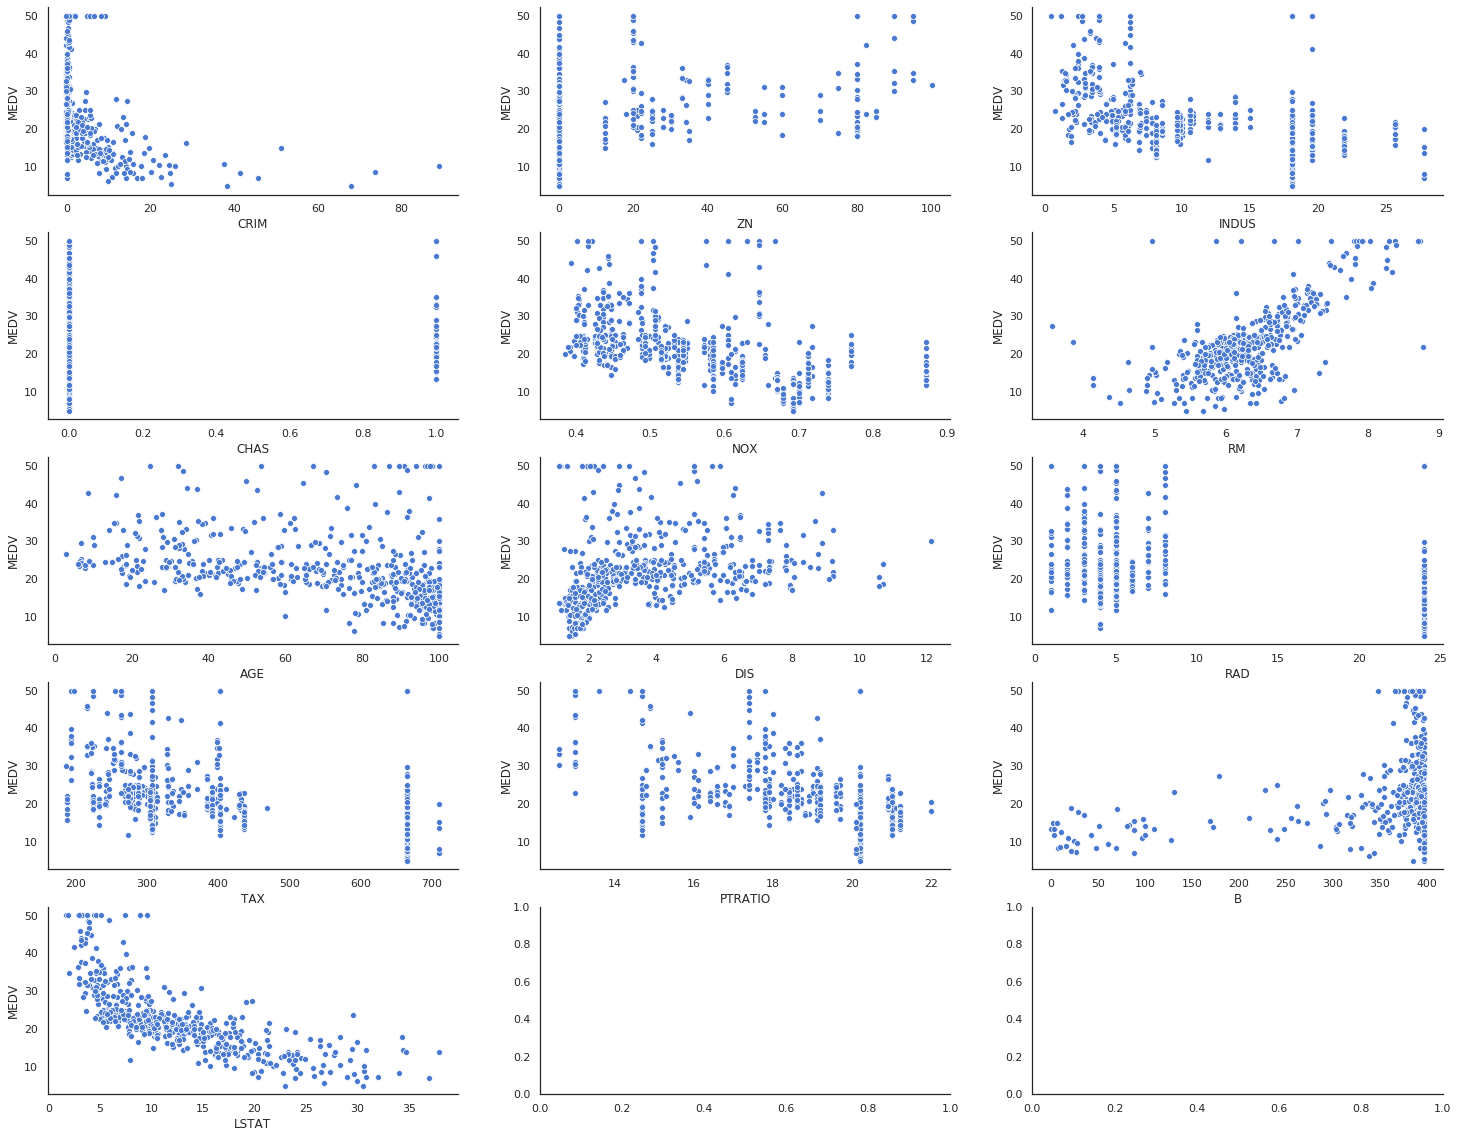

In [5]:
# 1.
import seaborn

seaborn.set(style="white", palette="muted", color_codes=True)

f, axes = plt.subplots(5, 3, figsize=(25, 20), sharex=False)
seaborn.despine()
f.suptitle("")

# Plots
seaborn.scatterplot(X_dataframe.CRIM, X_dataframe.MEDV, ax=axes[0, 0])
seaborn.scatterplot(X_dataframe.ZN, X_dataframe.MEDV, ax=axes[0, 1])
seaborn.scatterplot(X_dataframe.INDUS, X_dataframe.MEDV, ax=axes[0, 2])
seaborn.scatterplot(X_dataframe.CHAS, X_dataframe.MEDV, ax=axes[1, 0])
seaborn.scatterplot(X_dataframe.NOX, X_dataframe.MEDV, ax=axes[1, 1])
seaborn.scatterplot(X_dataframe.RM, X_dataframe.MEDV, ax=axes[1, 2])
seaborn.scatterplot(X_dataframe.AGE, X_dataframe.MEDV, ax=axes[2, 0])
seaborn.scatterplot(X_dataframe.DIS, X_dataframe.MEDV, ax=axes[2, 1])
seaborn.scatterplot(X_dataframe.RAD, X_dataframe.MEDV, ax=axes[2, 2])
seaborn.scatterplot(X_dataframe.TAX, X_dataframe.MEDV, ax=axes[3, 0])
seaborn.scatterplot(X_dataframe.PTRATIO, X_dataframe.MEDV, ax=axes[3, 1])
seaborn.scatterplot(X_dataframe.B, X_dataframe.MEDV, ax=axes[3, 2])
seaborn.scatterplot(X_dataframe.LSTAT, X_dataframe.MEDV, ax=axes[4, 0])

3. Bajo nuestra consideración las variables:
- Habitaciones por vivienda (RM)
- Porcentaje de habitantes de clase baja (LSTAT)
- Distancia a 5 centros de empleo (DIS)
- Proporción de tierra residencial dividida en zonas para lotes de más de 25,000 pies cuadrados (ZN)

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

<hr>

In [6]:
# 1.
feature = 'LSTAT'
selector = (boston['feature_names'] == feature)

X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]

X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [7]:
# 2.
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train_f, y_train)

print(linear_model.coef_, linear_model.intercept_)

[-0.95648761] 34.76519272372788


In [8]:
# 3.
from sklearn.metrics import mean_squared_error

pred_y_train = linear_model.predict(X_train_f) 
pred_y_test = linear_model.predict(X_test_f) 

train_error = mean_squared_error(y_train, pred_y_train)
test_error = mean_squared_error(y_test, pred_y_test)

print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 3.7e+01
Test error: 4.6e+01


In [9]:
from sklearn.metrics import r2_score

print('Coefficient of determination for training set prediction: %.2f'
      % r2_score(y_train, pred_y_train))

print('Coefficient of determination for testing set prediction: %.2f'
      % r2_score(y_test, pred_y_test))

Coefficient of determination for training set prediction: 0.57
Coefficient of determination for testing set prediction: 0.43


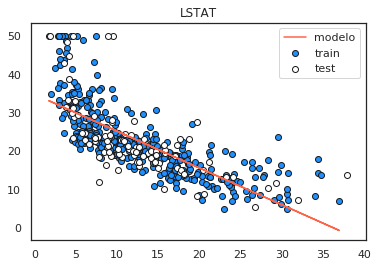

In [10]:
# 4.
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.plot(X_train_f, pred_y_train, color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")

plt.title(feature)
plt.legend()
plt.show()

5. La regresión está bien teniendo en cuenta que es lineal. Como era de esperarse no es perfecta y no puede ajustarse a muchos de los puntos con precisión. Dada la distribución de los datos puede que una regresión polinomial de grado mayor a 1 se ajuste mejor.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

<hr>

In [11]:
# 1.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []
pol_models = []
degrees = range(10)
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    pol_models.append(model)

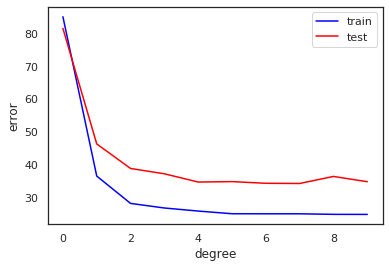

In [12]:
# 2.
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")

plt.legend()
plt.xlabel("degree")
plt.ylabel("error")

plt.show()

3. Consideramos que a partir del modelo de grado 5 empieza a haber sobreajuste porque, si bien el error en el conjunto de entrenamiento es bajo, no es así de bajo en el conjunto de prueba. Para grados superiores a 5 el error en el conjunto de pruebas no desciende sino que se mantiene o crece. Sospechamos que hay sobreajuste en la medida en que crece la diferencia entre el error de entrenamiento y el error de prueba.

4. El modelo de grado 4 es el que mejor funciona:

Train error: 2.6e+01
Test error: 3.5e+01


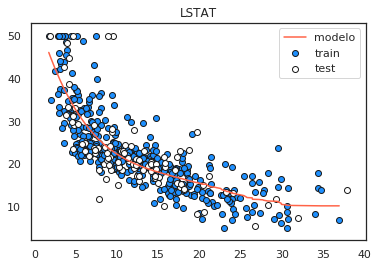

In [13]:
pol_model = pol_models[4]

pred_y_train_pol = pol_model.predict(X_train_f)
pred_y_test_pol = pol_model.predict(X_test_f)

train_error_pol = mean_squared_error(y_train, pred_y_train_pol)
test_error_pol = mean_squared_error(y_test, pred_y_test_pol)
print(f'Train error: {train_error_pol:0.2}')
print(f'Test error: {test_error_pol:0.2}')

plt.plot(sorted(X_train_f), sorted(pred_y_train_pol, reverse=True), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

5. A simple vista podemos ver cómo la regresión polinomial se ajusta mucho mejor a la naturaleza real de los datos que la lineal.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

<hr>

In [14]:
# 1.
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]

X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [15]:
# 2.
degree_m = 2
mult_model = make_pipeline(PolynomialFeatures(degree_m), LinearRegression())

mult_regresion = mult_model.fit(X_train_fs, y_train)

# Predecir y evaluar
pred_y_train_mult = mult_regresion.predict(X_train_fs) 
pred_y_test_mult = mult_regresion.predict(X_test_fs) 

train_error_mult = mean_squared_error(y_train, pred_y_train_mult)
test_error_mult = mean_squared_error(y_test, pred_y_test_mult)

print(f'Train error: {train_error_mult:0.2}')
print(f'Test error: {test_error_mult:0.2}')

Train error: 1.9e+01
Test error: 2.8e+01


In [16]:
train_errors_m = []
test_errors_m = []
degrees_2 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees_2:
    # train:
    multi_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    mr = multi_model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred_m = mr.predict(X_train_fs)
    y_test_pred_m = mr.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred_m)
    test_error = mean_squared_error(y_test, y_test_pred_m)
    train_errors_m.append(train_error)
    test_errors_m.append(test_error)

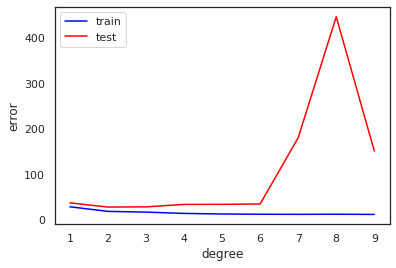

In [17]:
plt.plot(degrees_2, train_errors_m, color="blue", label="train")
plt.plot(degrees_2, test_errors_m, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

3. Disminuye el error cuadrático medio tanto para el conjunto de entrenamiento como para el conjunto de prueba. La incorporación de una segunda variable ayuda a que el modelo tengo una mayor capacidad de predicción.

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

